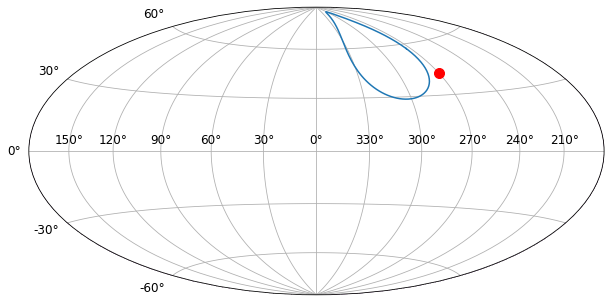

In [104]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.patches import Ellipse

nside = 16

m = np.full(hp.nside2npix(nside),0)
hp.projview(m,
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    color="white",
    cbar=False,
    longitude_grid_spacing=30,
    # phi_convention="counterclockwise",
    projection_type="hammer",
    hold=True
    # override_rot_graticule_properties={'g_linestyle': '-', 'g_color': 'w', 'g_alpha': 0.75, 'g_linewidth': 0.75, 't_step': 30, 'p_step': 30}
    )

hp.newprojplot(theta=np.radians(48), phi=np.radians(-90),marker="o", color="r", markersize=10);



u = 1  # x-position of the center
v = 1  # y-position of the center
a = 0.5  # radius on the x-axis
b = 0.5  # radius on the y-axis

t = np.linspace(0,2*np.pi,100)
plt.plot(u+a*np.cos(t), v+b*np.sin(t))

# plt.scatter(np.deg2rad(0), np.deg2rad(0), color="r", marker="x", linewidth=10, s=10)

# ells = Ellipse(xy=[1,1],width=1,height=1)

# ax.add_artist(ells)

In [5]:
%store -r dresults m

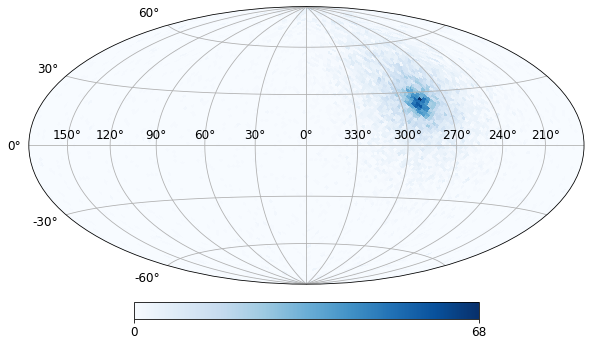

In [146]:
def sph2cart(obsPolar): #r=1
    x = np.sin(obsPolar[0]) * np.cos(obsPolar[1])
    y = np.sin(obsPolar[0]) * np.sin(obsPolar[1])
    z = np.cos(obsPolar[0])
    return (x, y, z)

nside = 32

npix = hp.nside2npix(nside)
cart_vecs = sph2cart((dresults.samples[:,2],dresults.samples[:,1]))
pixel_indices = hp.vec2pix(nside,cart_vecs[0],cart_vecs[1],cart_vecs[2])
idx, counts = np.unique(pixel_indices, return_counts=True)
hpx_map = np.zeros(npix, dtype=int)
hpx_map[idx] = counts

hp.projview(hpx_map,
            projection_type = 'hammer',
            coord=["G"],
            graticule=True,
            graticule_labels=True,
            # color="white",
            cbar=True,
            longitude_grid_spacing=30,
            # phi_convention="counterclockwise",
            hold=True,
            cmap="Blues"
            # override_rot_graticule_properties={'g_linestyle': '-', 'g_color': 'w', 'g_alpha': 0.75, 'g_linewidth': 0.75, 't_step': 30, 'p_step': 30}
            )

# this does not weight the points though: see cell below

/var/folders/f0/bpm69fqn0jl4w0k0w01_lftw0000gn/T/ipykernel_34918/3707689347.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]


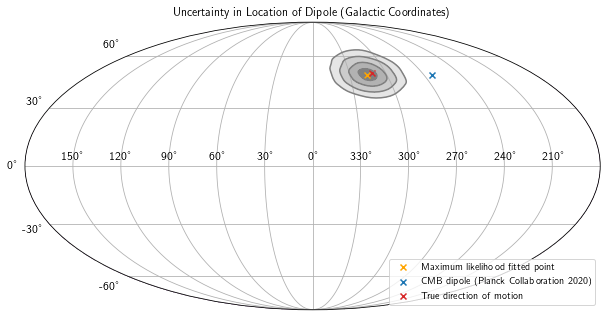

In [24]:
import dynesty.plotting as dyplot
import matplotlib.pyplot as plt
import healpy as hp
import dynesty.plotting as dyplot
import numpy as np
from matplotlib import rc
import matplotlib

### LaTeX Font for plotting ###
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Times-Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
##########

# %matplotlib widget
%store -r dresults m hpx_map

hpx_map_dens = hpx_map
nside = 16
npix = hp.nside2npix(nside)
hpx_map = np.zeros(npix)

pol_true, az_true = (0.7, 4)

hp.projview(hpx_map,
            projection_type='mollweide',
            coord=["G"],
            graticule=True,
            graticule_labels=True,
            color="white",
            cbar=False,
            longitude_grid_spacing=30,
            # margins=None
            # phi_convention="counterclockwise",
            # hold=True,
            # cmap="Blues"
            # override_rot_graticule_properties={'g_linestyle': '-', 'g_color': 'w', 'g_alpha': 0.75, 'g_linewidth': 0.75, 't_step': 30, 'p_step': 30}
            )

# the try statement is due to an annoying set xlim TypeError error which recommend me to use cartopy
try:
    # ax = plt.figure()
    # ax.add_subplot(projection='mollweide')
    plt.grid(True)
    dyplot._hist2d(
        dresults.samples[:, 1] - np.pi,  # x: phi
        np.pi/2 - dresults.samples[:, 2],  # y: theta
        weights=np.exp(dresults['logwt']-dresults['logz']
                    [-1])  # line 1246 plotting.py
        )
except TypeError:
    plt.scatter(
        dresults.samples[-1, 1] - np.pi, np.pi/2 - dresults.samples[-1, 2],
        marker='x',
        color='orange',
        label='Maximum likelihood fitted point')
    plt.scatter(
        2*np.pi - 264.021 * np.pi/180,
        48.253*np.pi/180,
        marker='x',
        color='tab:blue',
        label='CMB dipole (Planck Collaboration 2020)')
    plt.scatter(
        az_true - np.pi,
        np.pi/2 - pol_true,
        marker='x',
        color='tab:red',
        label='True direction of motion'
    )
    plt.legend(loc='lower right')
    plt.title('Uncertainty in Location of Dipole (Galactic Coordinates)')
    pass

plt.savefig("Report Figures/uncertainty-on-sky.pdf", bbox_inches='tight')


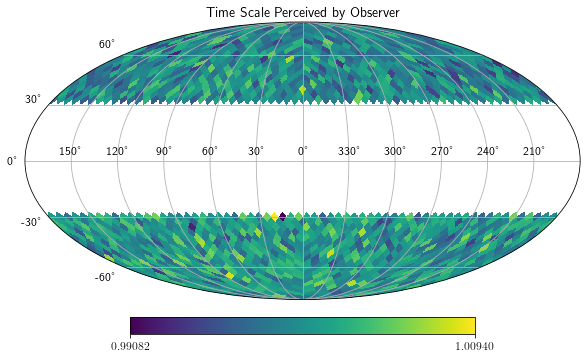

In [4]:
import matplotlib.cm as cm
import healpy as hp
# %matplotlib widget

m[m == 0] = hp.UNSEEN

hp.projview(hp.ma(m),
    cmap='viridis',
    title='Time Scale Perceived by Observer',
    projection_type='mollweide',
    graticule=True,
    graticule_labels=True,
    longitude_grid_spacing=30
    )
    
# hp.graticule(dpar=30,dmer=30,coord='G')

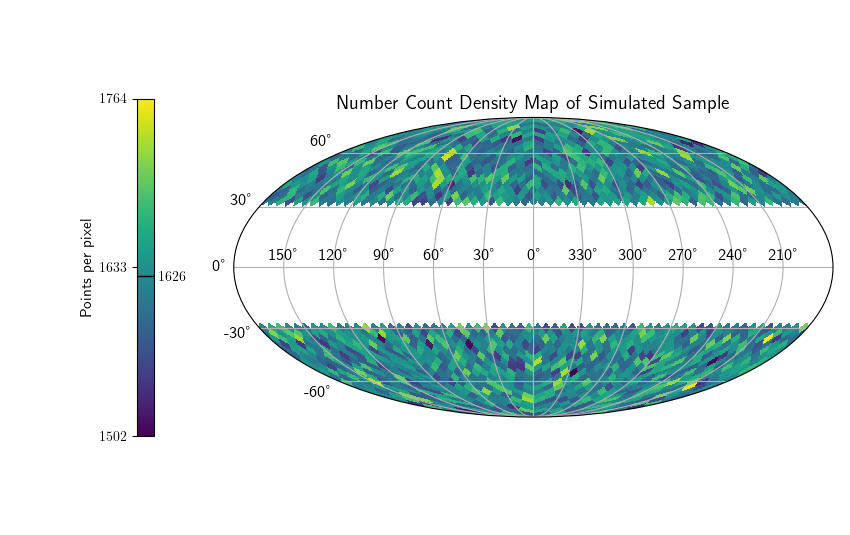

In [107]:
# %matplotlib widget

hpx_map_dens[np.where(m == hp.UNSEEN)] = 0

ticks = [np.mean(hpx_map_dens[hpx_map_dens != 0])]

image = hp.projview(hp.ma(hpx_map_dens,badval=0),
            title='Number Count Density Map of Simulated Sample',
            projection_type='mollweide',
            graticule=True,
            graticule_labels=True,
            longitude_grid_spacing=30,
            cbar=False
            # unit='Points per pixel',
            )

fig = plt.gcf()
ax = plt.gca()
middle_val = (min(hpx_map_dens[hpx_map_dens != 0]) + max(hpx_map_dens))/2


cbar = fig.colorbar(image,
    location='left',
    ax=ax,
    shrink=0.7,
    anchor=(1.0,0.5),
    label='Points per pixel',
    ticks=[
        min(hpx_map_dens[hpx_map_dens != 0]),
        max(hpx_map_dens),
        middle_val]
    )

cbar.ax.hlines(np.mean(hpx_map_dens[hpx_map_dens != 0]),0,1,
    colors='k',
    linewidth=1
    )
cbar.set_label(label='Points per pixel',size=11)
cbar.ax.text(1.3,np.mean(hpx_map_dens[hpx_map_dens != 0])-4,'${:.0f}$'.format(
    np.mean(hpx_map_dens[hpx_map_dens != 0])))

plt.savefig("Report Figures/number-count-density.pdf",bbox_inches='tight')

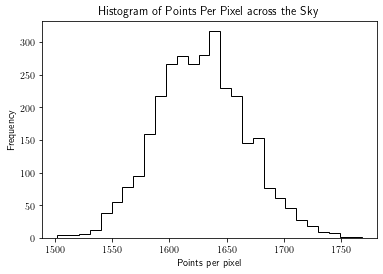

In [23]:
from astropy.visualization import hist
from matplotlib.pyplot import xlabel

fig,ax = plt.subplots(1,1)

ax.hist = hist(hpx_map_dens[hpx_map_dens != 0],
    bins='scott',
    histtype='step',
    color='k')

ax.set_xlabel('Points per pixel')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Points Per Pixel across the Sky')

plt.savefig("Report Figures/number-count-histogram.pdf", bbox_inches='tight')


In [ ]:
dyplot._hist2d(
    dresults.samples[:, 1] - np.pi,  # x: phi
    np.pi/2 - dresults.samples[:, 2],  # y: theta
    weights=np.exp(dresults['logwt']-dresults['logz']
                   [-1]),  # line 1246 plotting.py
)

TypeError: Changing axes limits of a geographic projection is not supported.  Please consider using Cartopy.

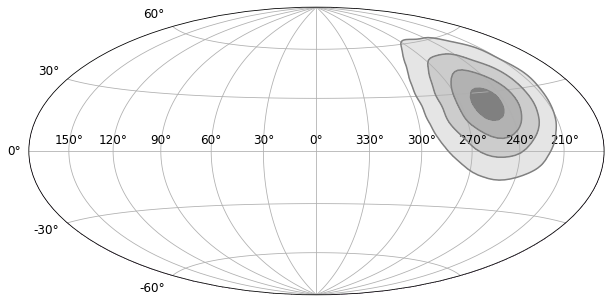

In [10]:
import numpy as np
import healpy as hp
import dynesty.plotting as dyplot

nside = 16

npix = hp.nside2npix(nside)

hpx_map = np.zeros(npix)

hp.projview(hpx_map,
            projection_type = 'hammer',
            coord=["G"],
            graticule=True,
            graticule_labels=True,
            color="white",
            cbar=False,
            longitude_grid_spacing=30,
            # phi_convention="counterclockwise",
            # hold=True,
            # cmap="Blues"
            # override_rot_graticule_properties={'g_linestyle': '-', 'g_color': 'w', 'g_alpha': 0.75, 'g_linewidth': 0.75, 't_step': 30, 'p_step': 30}
            )

dyplot._hist2d(
    dresults.samples[:, 1] - np.pi,  # x: phi
    np.pi/2 - dresults.samples[:, 2],  # y: theta
    weights=np.exp(dresults['logwt']-dresults['logz'][-1]))  # line 1246 plotting.py


5.034368698999186